<h1>Linear Model</h1>

# import


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')


# Linear Regression(선형 회귀)
* Regression toward the mean(Francis Galton, 1822~1911)
* 선형회귀 모델 : 샘플 데이터를 가장 잘 대표하는 직선의 방정식
  * $𝑦=𝑎𝑥+𝑏 $
    * $𝑎$  : 기울기(Gradient)
    * $𝑏$  : 절편(Intercept)
* 선형회귀 알고리즘
  * OLS(Ordinary Least Square) : 최소 제곱법
    * 잔차(Residual)의 제곱이 최소가 되는 계수(Weight) 계산
  * GD(Gradient Descent) : 경사 하강법
    * 손실이 작아지는 방향으로 반복적으로 이동

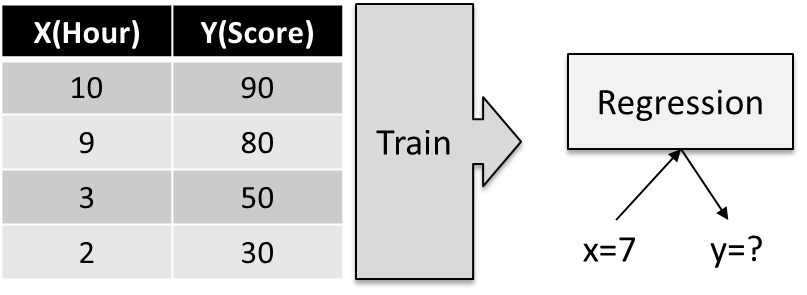


## 최소 제곱법(Least Sqaure)
* RSS(Residual Sum of Square)
  * 실제 값(𝑦)과 가설에 의한 예측 값(𝑦 ̂)의 차이가 가장 작은 계수(a, b) 계산
  * Residual(잔차) : $𝐸𝑟𝑟𝑜𝑟=𝑦 − \hat{𝑦}$
    * $ \hat{𝑦}= ax + b$
    * $𝑅𝑆𝑆(𝑎, 𝑏)= \sum(𝑦 − \hat{𝑦})^2 = \sum(𝑦 −(𝑎𝑥+𝑏))^2$
      * $𝑅𝑆𝑆(𝑎,𝑏)$가 최소가 되는 $𝑎, 𝑏$
      * \begin{cases}
        0= \frac{\partial 𝑅𝑆𝑆}{\partial 𝑎}=2\sum(𝑦 −𝑎𝑥 −𝑏)(−𝑥) \\
        0= \frac{\partial𝑅𝑆𝑆}{\partial𝑏}=2\sum(𝑦 −𝑎𝑥 −𝑏)(−1)       \end{cases}
      * $\displaystyle a = \frac{\sum(x-\hat{x})(y-\hat{y})}{\sum((x-\hat{x})^2)}$
      * $b = \bar{y} - a\bar{x}$
* 한계
  * 이상치(outlier)에 취약
  * 특징 변수의 갯수와 샘플 건수에 비례해서 계산 비용 높음

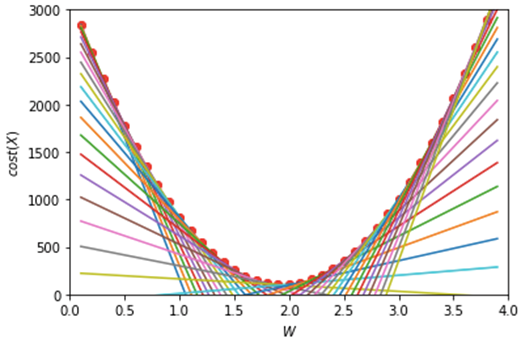

### 직접 구현 실습
* `X = np.array([10,9,3,2]) `
* `y = np.array([90,80,50,30])`

a:6.6, b:22.900000000000006


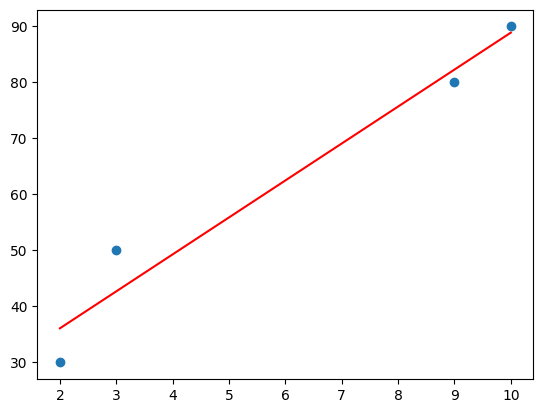

In [ ]:
X = np.array([10,9,3,2])
y = np.array([90,80,50,30])

plt.plot(X, y, 'o')



* x = 7일 때 예측

69.1


###  `LinearRegression()`
* `sklearn.linear_model.LinearRegression(fit_intercept, normalize)`
    * OLS(Oerdinary Least Sqaures) 최소 제곱 추정 방식 구현
    * `fit_intercept=True` : bias 사용 여부
    * `normalize = False` : 수행 전에 입력 데이타 정규화, `fit_inercept=False`인 경우 무시
    * `coef_` :  W 계수
    * `intercept_` : bias 절편

In [ ]:
from sklearn.linear_model import LinearRegression



[6.6] 22.899999999999977


* x = 7 일 때 예측

[69.1] [69.1]


### 이상치를 포함한 데이터

a:3.4285714285714284, b:34.0


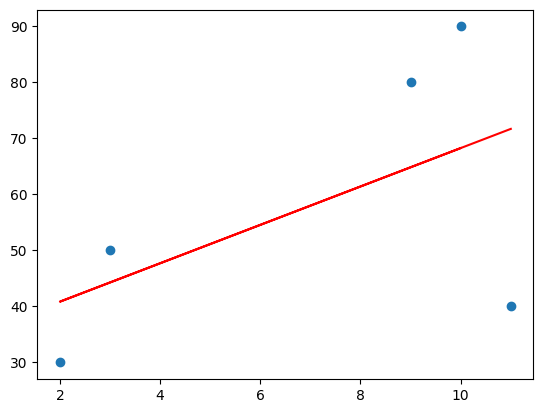

In [ ]:
X2 = np.array([10,9,3,2, 11])
y2 = np.array([90,80,50,30, 40])

plt.plot(X2, y2, 'o')



## 경사 하강법(Gradient Descent)
* 가설(Hypothesis)에 의한 손실이 가장 작은 모델 찾기
* $H(X) = WX + b, \hat{y}=ax+b$
  * $𝐻(X)$  : Hypothesis, 가설
  * $𝑊$  : Weight(가중치), 최초 무작위 추출
  * $𝑏$  : Bias(편향), 최초 0
* 손실(Cost) 함수
  * $MSE(W, b) = \frac{1}{n}\sum(y-(WX+b))^2$
* Weight, bias 업데이트
  * $W_{t+1} = W_t - \frac{\partial cost(W, b)}{\partial W}\alpha$
  * $b_{t+1} = b_t - \frac{\partial cost(W, b)}{\partial b}\alpha$
    * $0 < \alpha \le 1$ : learning rate

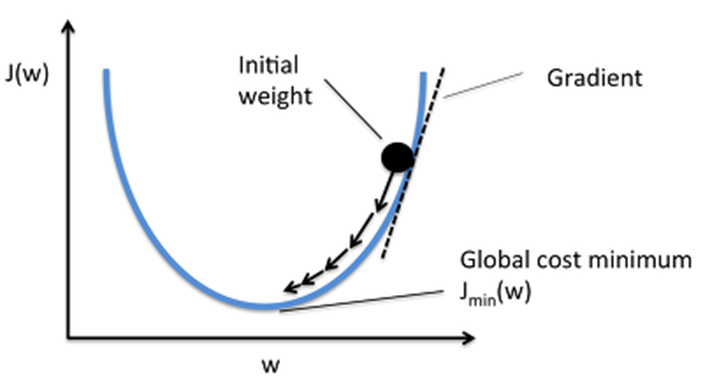


### Gradient Descent, 실습
#### 샘플 데이타 생성
* 단순화 하기 위해서 계수 1개만으로 제한
* m개의 샘플 데이타를 만든다.
* X 데이타 : `np.arange(n) `
    * 0 ~ n -1
* y 데이타 : X * 2
    * 데이타가 너무 정직해서 약간의 노이즈를 추가

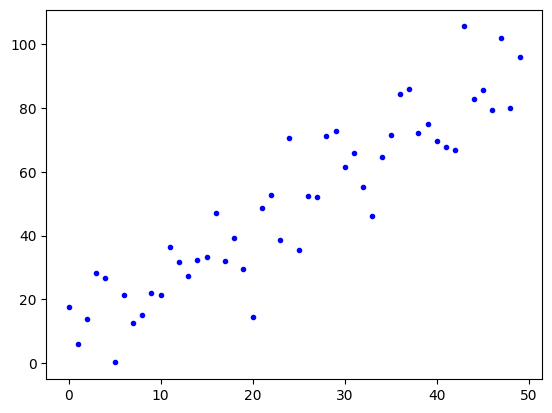

In [ ]:
np.random.seed(0)
n = 50 #sample count
X = np.arange(n)
y = X  * 2 # W = 2, b=0(bias 생략)
y = y + 10 * np.random.randn(n) # adding noise

plt.plot(X, y, 'b.')
plt.show()

### Hypothesis와 Cost함수
* Hypothesis(가설)
  * $H(X) = WX$
* Cost함수 : MSE(Mean Squared Error, 평균 제곱 오차)
  * $cost(W) = \frac{1}{n}\sum(y-H(X))^2 = \frac{1}{n}\sum(y-(WX+b))^2$
* 𝑊값의 관측 범위 :  0.1 ~ 4.0,  0.1씩 증가
  * 𝑊의 변화에 따라 Cost의 변화량 시각화
  * MSE 함수는 미분 가능한 Convex 함수

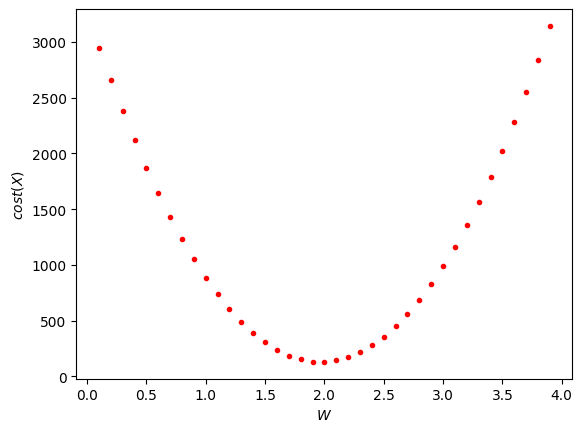

In [ ]:
w_range = np.arange(0.1, 4, 0.1) # w관찰 범위
costs = np.array([])
for i, w in enumerate(w_range):
    cost = 1/n * np.sum((y-w*X)**2)
    costs = np.append(costs, cost)
plt.plot(w_range, costs, 'r.')
plt.xlabel('$W$')
plt.ylabel('$cost(X)$');

### Cost 함수와 Gradient

* Cost 함수 최소화, $𝑚𝑖𝑛𝑖𝑚𝑖𝑧𝑒(𝑐𝑜𝑠𝑡(𝑊))$
  * Cost 함수가 Convex하면 최소값을 찾기 위해 기울기를 따라 이동
  * Cost 함수를 미분해서 기울기 얻기
    * $\frac{𝜕𝑐𝑜𝑠𝑡(𝑊)}{𝜕𝑊}=\frac{2}{𝑛}\sum(𝑦 −(𝑊𝑋))(−𝑋)$
  * 미분한 결과를 Cost 함수의 변화에 시각화
  * 미분한 결과를 일정한 값(learning_rate)의 비율로 𝑊에서 빼는 것을 반복
    * $W_{t+1} = W_t - \frac{\partial cost(W)}{\partial W}\alpha$
    * $0< \alpha \le 1$ : learning_rate(학습률)

Text(0, 0.5, '$cost(X)$')

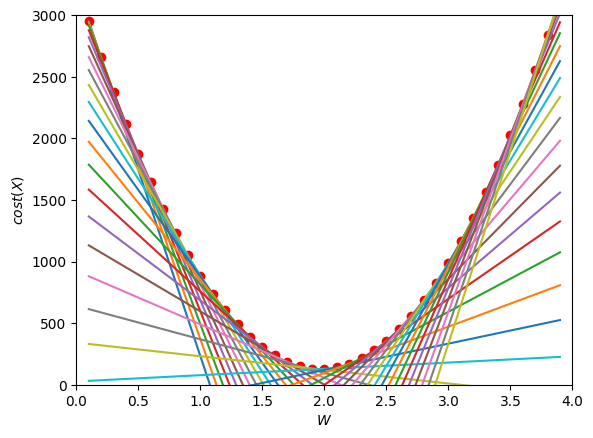

In [ ]:
plt.plot(w_range, costs, 'ro')
for w, cost in zip(w_range, costs):
    gradient =  2/n * np.sum( (y-w*X) * -X)
    #print(w, gradient)
    plt.plot(w_range, gradient*(w_range-w)+cost) #gradient는 원점을 기준으로 계산되기 때문에
    plt.axis([0, 4, 0, 3000])
plt.xlabel('$W$')
plt.ylabel('$cost(X)$')

### Batch Gradient Descent
* 전체 샘플에 대해서 경사 하강법을 이용해서 예측

initial W 0.5488135039273248
epoch: 0  cost: -193.1115851790496  gradient: -2295.454695678768  W: 0.6635862387112632
epoch: 20  cost: -2301.114190012246  gradient: -425.2032314542253  W: 1.7266917633507117
epoch: 40  cost: -2929.055758247942  gradient: -78.76338765451109  W: 1.9236182830962327
epoch: 60  cost: -3053.52175157602  gradient: -14.58989672679054  W: 1.960096368554621
epoch: 80  cost: -3076.857042540978  gradient: -2.7025892719615503  W: 1.9668534611007598
epoch: 100  cost: -3081.1891958714687  gradient: -0.5006196349222006  W: 1.9681051249176333
epoch: 120  cost: -3081.9920002943254  gradient: -0.09273329894046867  W: 1.9683369794171497
epoch: 140  cost: -3082.1407207032894  gradient: -0.017177641730981463  W: 1.9683799274581664
epoch: 160  cost: -3082.168269619063  gradient: -0.003181935494984032  W: 1.9683878830261234
epoch: 180  cost: -3082.173372711953  gradient: -0.0005894123097363035  W: 1.9683893566919775
suspended: 200
Final W: 1.9683896242104273


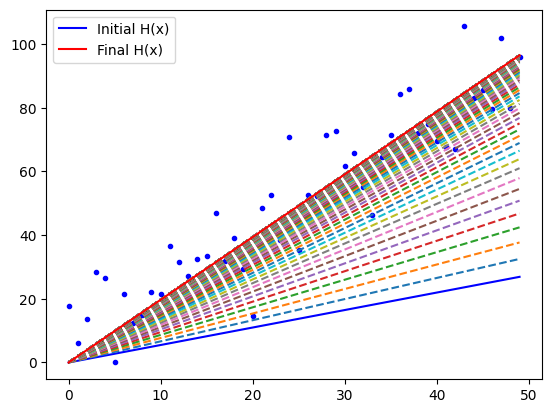

In [ ]:
plt.plot(X, y, 'b.')
np.random.seed(0)
W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)
learning_rate = 0.00005
suspend = 0.00001
old_g = None
epochs = 1000




### Stochastic Gradient Descent
* 임의의 작은 샘플에 대해서 기울기 계산

initial W 0.5488135039273248
epoch:0, cost:1.2156399992347473e+74, gradient:-6.1743396712524396e+38, W:5.780568008545014e+36, learn_rate:0.01
epoch:5, cost:1.0703921832902619e+83, gradient:-3.2716848614899663e+42, W:-6.426523835069576e+40, learn_rate:0.00035714285714285714
epoch:10, cost:51.538218040736865, gradient:-201.01234525256825, W:1.8408062703515014, learn_rate:0.0001818181818181818
epoch:15, cost:1.0643630274735796, gradient:55.71070443023457, W:1.9620890194849485, learn_rate:0.00012195121951219512
epoch:20, cost:76.96809288973762, gradient:-105.2777534720523, W:2.1309481849236604, learn_rate:9.174311926605505e-05
epoch:25, cost:3.573989366099507, gradient:30.24799625961154, W:2.1050647886642375, learn_rate:7.352941176470588e-05
epoch:30, cost:0.0009203947676372029, gradient:-2.8517728112250325, W:2.1649529458061076, learn_rate:6.134969325153375e-05
epoch:35, cost:275.92096180910636, gradient:-930.2086519880137, W:2.00313418432193, learn_rate:5.2631578947368424e-05
epoch:40, c

(0.0, 50.0, 0.0, 100.0)

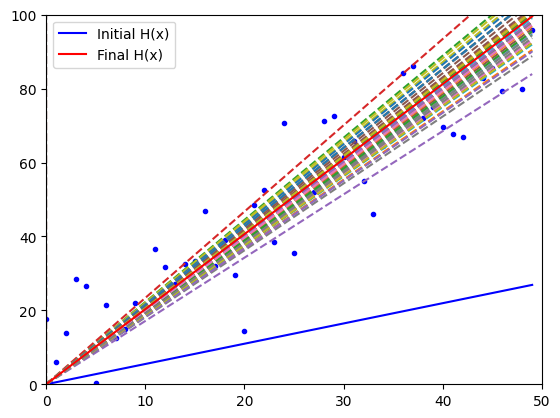

In [ ]:
plt.plot(X, y, 'b.')
np.random.seed(0)
W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)
t0, t1 = 1, 100
epochs = 50
batches = 1
for epoch in range(epochs):
    for i in range(n):
        idx = np.random.randint(0,n, batches)
        x_i, y_i = X[idx], y[idx]
        cost =  np.sum((y_i-W*x_i)**2)
        gradient = 2* np.sum((y_i-W*x_i) * -x_i)
        learning_rate = t0/(t1 + (epoch * (n + i*10)))
        #learning_rate = 0.0005
        W = W - learning_rate * gradient
    plt.plot(X, W*X, '--')
    if epoch %5 ==0:
        print(f'epoch:{epoch}, cost:{cost}, gradient:{gradient}, W:{W}, learn_rate:{learning_rate}')

print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()
plt.axis([0, 50, 0, 100])

### `SDGRegressor()`
* `sklearn.linear_model.SGDRegressor(loss, penalty, max_iter, tol, learning_rate, eta0, ...)`
  * `loss='squared_error'` : 손실 함수
    * 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'
  * `penalty='l2'` : 규제
    * 'l2', 'l1', 'elasticnet'
  * `max_iter=1000` : 반복 횟수
  * `tol=1e-3` : 반복 중지 조건
    * None이 아니면 loss > best_loss - tol 을 만족할 때 중지
  * `learning_rate='invscaling'` : 학습률
    * 'constatnt' : eta0
    * 'optimal' : 1.0/(alpha * (t +t0))
    * 'invscaling' : eta0/pow(t, power_t)
    * 'adaptive' : eta0, 단 연속해서 손실을 줄이지 못하면 5로 나누기
  * `eta0=0.01` : 초기 learning rate 값


W: [2.04434287] b: [1.42691126]


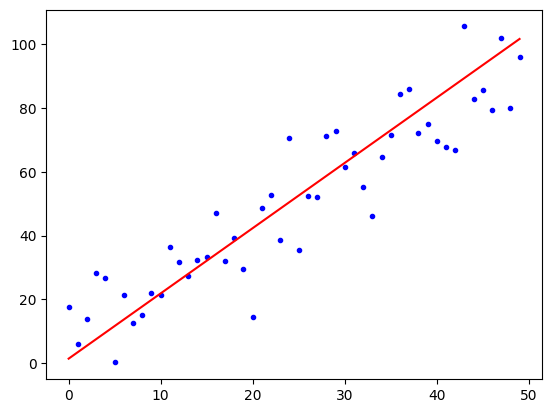

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
n = 50 #sample count
X = np.arange(n, dtype=np.float32).reshape(-1,1)
y = X  * 2 # W = 2, b=0(bias 생략)
y = y + 10 * np.random.randn(n,1) # adding noise

#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)

plt.plot(X, y, 'b.')



# 회귀 평가 지표
* MAE(Mean Absolute Error)
  * 실제 값과 예측 값 차이의 절대 값 평균
  * $\frac{1}{n}\sum|y - \hat{y}|$
  * `sklearn.metrics.mean_absolute_error(y_true, y_pred)`
* MSE(Mean Squared Error)
  * 실제 값과 예측 값 차이 제곱의 평균
  * $\frac{1}{n}\sum(y - \hat{y})^2$
  * `sklearn.metrics.mean_squared_error(y_true, y_pred)`
* RMSE(Root Mean Squared Error)
  * MSE의 제곱근
  * $\sqrt{\frac{1}{n}\sum(y - \hat{y})^2}$
  * `sklearn.metrics.mean_squared_error(y_true, y_pred, squared=False)`
* 𝑅^2(R-Squared, 결정계수)
  * 실제 값의 분산 대비 예측 값의 분산 비율, 최대:1, 최소:0, 최악:음수
  * $\displaystyle 1- \frac{\sum(y-\hat{y})^2}{\sum(y-\bar{y})^2}$
  * `sklearn.metrics.r2_score(y_true, y_pred)
model.score(X, y)`


## MAE vs RMSE
* MAE ≤ RMSE
* MAE:틀린 정도를 명확하게 표현, 모든 오차에 동일한 가중치 부여
* RMSE:큰 오류에 대해 더 큰 차이 표현, 이상치에 더 큰 가중치 부여

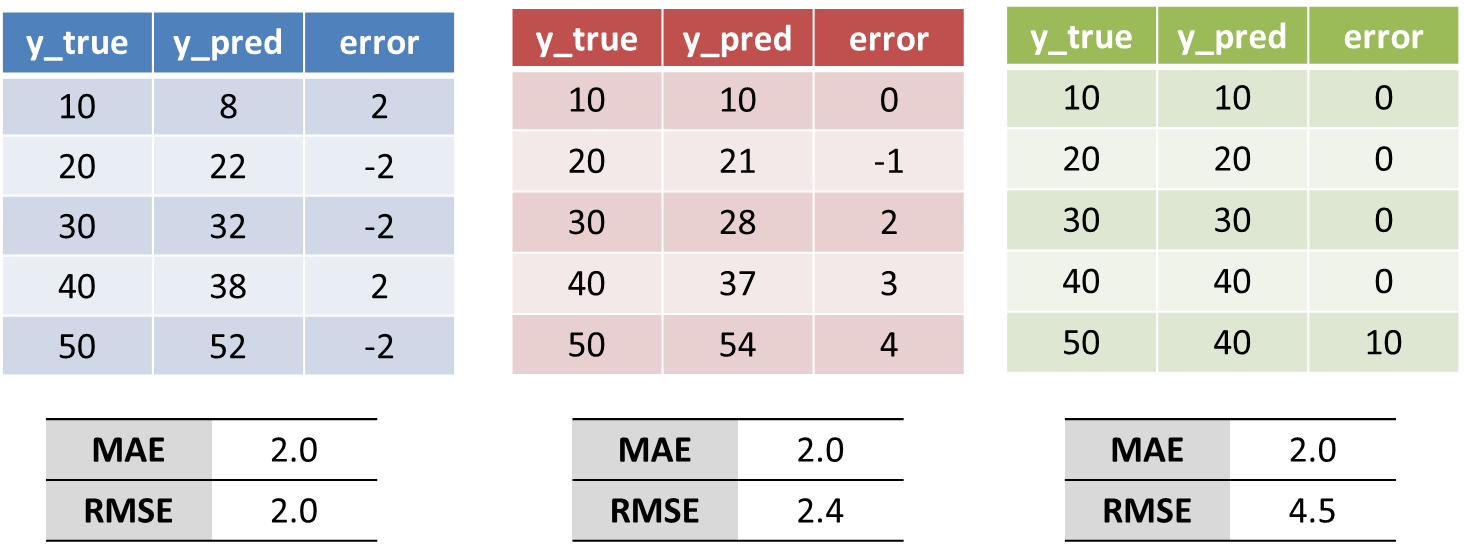

In [ ]:
y_true = np.array([10,20,30,40,50])
y_pred1 = np.array([8,22,32,38,52])





print(f'error: {y_true - y_pred1}, mae:{mae1}, rmse:{rmse1}, mse:{mse1}, r2:{r2_1}')

error: [ 2 -2 -2  2 -2], mae:2.0, rmse:2.0, mse:4.0, r2:0.98


In [ ]:
y_true = np.array([10,20,30,40,50])
y_pred2 = np.array([10,21,28,37,54])

mae2 = mean_absolute_error(y_true, y_pred2)
mse2 = mean_squared_error(y_true, y_pred2)
rmse2 = mean_squared_error(y_true, y_pred2, squared=False)
r2_2 = r2_score(y_true, y_pred2)
print(f'error: {y_true - y_pred2}, mae:{mae2}, rmse:{rmse2}, mse:{mse2}, r2:{r2_2}')

error: [ 0 -1  2  3 -4], mae:2.0, rmse:2.449489742783178, mse:6.0, r2:0.97


In [ ]:
y_true = np.array([10,20,30,40,50])
y_pred3 = np.array([10,20,30,40,40])

mae3 = mean_absolute_error(y_true, y_pred3)
mse3 = mean_squared_error(y_true, y_pred3)
rmse3 = mean_squared_error(y_true, y_pred3, squared=False)
r2_3 = r2_score(y_true, y_pred3)
print(f'error: {y_true - y_pred3}, mae:{mae3}, rmse:{rmse3}, mse:{mse3}, r2:{r2_3}')

error: [ 0  0  0  0 10], mae:2.0, rmse:4.47213595499958, mse:20.0, r2:0.9


# 보스톤 주택가격, 회귀 예제
* `sklearn.datasets.load_boston()`
* `!pip install –U boston`
* `boston.load_boston()`
  * CRIM : 범죄 발생률
  * ZN :25kFt 초과 거주 지역 비율
  * INDUS : 비상업 지역 넓이 비율
  * CHAS : 찰스강에 위치한 경우 1, 아니면 0
  * NOX : 일산화탄소 농도
  * RM : 방의 갯수
  * AGE : 1940 이전 건축 주택 비율
  * DIS : 5개 고용센터 거리
  * RAD : 고속도로 접근 용이도
  * TAX : $10,000 당 재산세율
  * PTRATIO : 교사와 학생 수 비율
  * B : 흑인 거주 비율
  * LSTAT : 하위 계층 비율
  *MEDV : 본인 소유 주택 가격



In [ ]:
!pip install -U boston

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from boston import load_boston



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
from boston import load_boston



==========LinearRegression=============
train score:0.770, test score:0.635
MAE:3.668, RMSE:5.457, R2:0.635
coef: ['-1.012', '1.026', '-0.040', '0.607', '-1.805', '2.646', '-0.198', '-3.019', '2.088', '-1.902', '-2.132', '0.770', '-3.561']
bias: 22.40880610329137
==========SGDRegressor=============
train score:0.769, test score:0.625
MAE:3.717, RMSE:5.536, R2:0.625
coef: ['-0.944', '0.933', '-0.337', '0.656', '-1.537', '2.740', '-0.292', '-2.874', '1.384', '-1.239', '-2.086', '0.775', '-3.531']
bias: [22.42351974]


#  다항 회귀(Polynomial Variable Regression)

* 입력 변수와 출력 변수 간의 관계가 선형이 아닌 경우
* 1차식으로 표현 불가
* 2차식으로 변형


## 다차항 변환의 의미

Text(0, 0.5, 'y')

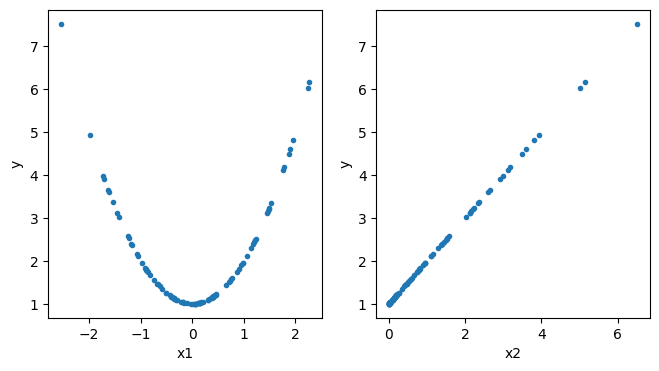

In [ ]:
np.random.seed(0)
x1 = np.random.randn(100)
y = x1**2 + np.random.randint(1, 10)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(x1, y, '.')
plt.xlabel('x1')
plt.ylabel('y')

x2 =  x1**2
plt.subplot(1,3,2)
plt.plot(x2, y, '.')
plt.xlabel('x2')
plt.ylabel('y')

Text(0.5, 0, 'x2')

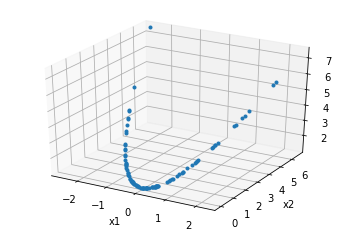

In [ ]:
fig, axs = plt.subplots(subplot_kw={"projection":"3d"})

plt.plot(x1, x2, y, '.')
plt.xlabel('x1')
plt.ylabel('x2')

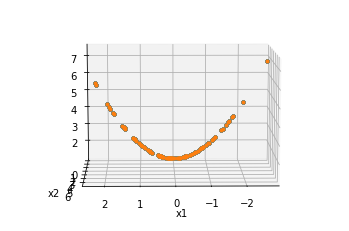

In [ ]:
from matplotlib import animation, rc
rc('animation', html='html5')
fig, axs = plt.subplots(subplot_kw={"projection":"3d"})

def update(i):
  ax, = plt.plot(x1, x2, y, '.')
  plt.xlabel('x1')
  plt.ylabel('x2')
  axs.view_init(elev=10., azim=i)
  return [ax]

animation.FuncAnimation(fig, update, frames=90, interval=20, blit=True)

## `PolynomialFeatures()`
* `sklearn.preprocessing.PolynomialFeatures(degree, include_bias)`
  * `degree` : 차수
  * `include_bias` : 1로 채운 컬럼 추가 여부


In [ ]:
from sklearn.preprocessing  import PolynomialFeatures

x = np.arange(10).reshape(-1,1)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(x)
poly.transform(x)

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.],
       [ 5., 25.],
       [ 6., 36.],
       [ 7., 49.],
       [ 8., 64.],
       [ 9., 81.]])

## 다항회귀 실습
* $x = \text{random}(-3, 2, 100)$
* $y = 2x^2 + 3x + 5$

(100, 1) (100, 1) [[-2.97652262]
 [-2.906051  ]
 [-2.89946227]
 [-2.89890801]
 [-2.80406104]] [[12.62465611]
 [14.0729383 ]
 [13.58103853]
 [11.57436761]
 [13.8015857 ]]


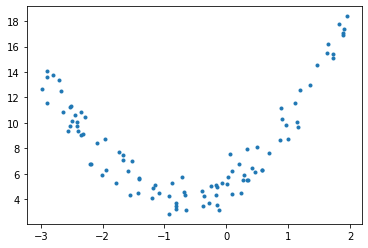

In [ ]:
np.random.seed(0)
m = 100
X = np.sort(np.random.uniform(-3, 2, (m,1)), axis=0)
y = 2*X**2 + 3*X + 5 + np.random.randn(m, 1) # 2x^2 + 3x  + 5 + noise
print(X.shape, y.shape, X[:5], y[:5])

plt.plot(X, y, '.');

* `PolynomialFeatures`
* `LinearRegression`

[-2.97652262] [-2.97652262  8.8596869 ]
weights: [[2.84121748 1.97920696]] bias: [5.14296208]


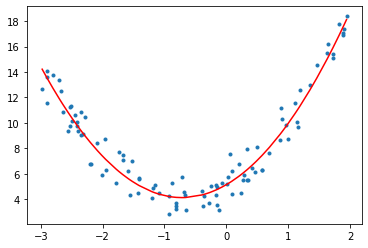

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.plot(X, y, '.')



## 보스턴 주택가격, 다항회귀

In [ ]:
!pip install -U boston
from boston import load_boston

In [ ]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)




train r2: 0.9520519609032732 test r2: 0.607472195966595


## 다항 회귀와 과적합
* 차수를 높일 수록 학습 데이터에 과적합(overfitting)
* 싸인파(sin) 에 차수를 1차, 4차, 18차로 변화 하면서 관찰


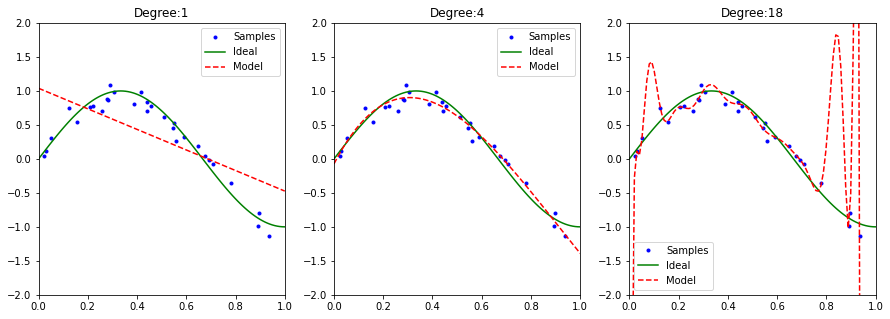

In [ ]:
def sin(X):
    return np.sin(1.5 * np.pi * X)

m = 30
np.random.seed(3)
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

degrees = (1, 4, 18)
plt.figure(figsize=(15,5))

for i, degree  in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    lr = LinearRegression()
    pipe = Pipeline([('poly', poly), ('linear_regression', lr)])
    pipe.fit(X.reshape(-1,1), y)

    X_ = np.linspace(0,1, 100)
    plt.subplot(1, len(degrees), i+1)
    plt.plot(X, y, 'b.', label='Samples')
    plt.plot(X_, sin(X_), 'g-', label='Ideal')
    plt.plot(X_, pipe.predict(np.expand_dims(X_, axis=1)), 'r--', label='Model')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:{degree}");

# 규제화
* 다항 회귀와 과적합
  * 차수(Degree)가 높아 질 수록 학습 데이터에 과적합 발생
  * 예측 성능 저하
  * 회귀 계수 크기 제어 필요
* 규제, 제약(penalty)
  * 제약식 표현	: $\text{minimize⁡}(∑(𝑦−𝑊𝑋)^2), \text{subject to} ‖𝑊‖ \le t$
  * 손실 함수 :  $\text{minimize}⁡(\sum(y-WX)^2+ \alpha‖W‖)$

## Norm
* 벡터의 길이 혹은 크기를 측정하는 방법(함수)
* Norm으로 측정한 벡터의 크기는 원점에서 벡터 좌표까지의 거리(Distance) 또는 규모(Magnitude)라고 한다.
* Norm의 차수가 𝑝인 경우 아래와 같이 표현
  * $L_p = \|X\|_p = (\sum|X|^p)^{\frac{1}{p}}$
    * 𝑝 : Norm의 차수, 1, 2, ∞
* 일반적으로  L1 Norm, L2 Norm 을 주로 사용


## 규제 모델
* Ridge(릿지)
  * L2 규제 계수 적용
* Lasso(라쏘)
  * L1 규제 계수 적용
* Elastic Net(엘라스틱넷)
  *L2, L1 혼합 계수 적용


## Ridge(릿지) 모델
* L2 규제 계수를 적용
  * $cost = \sum(y-\hat{y})^2 + \alpha\sum\|w\|_2^2$
  * 계수(𝑤)를 작게 해서 과적합 해소
* L2 Norm 시각화
  * 벡터 𝑊 의 L2 Norm이 1일 때
  * $W = [W_1, W_2]$
  * $\|W\|_2 = \sqrt{w_1^2 + w_2^2}$

  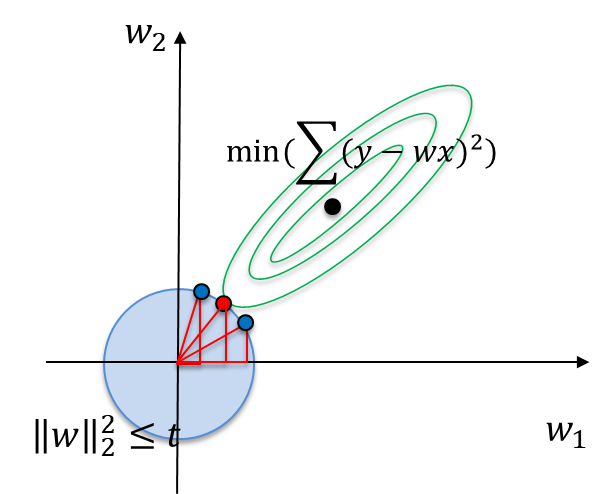

* `sklearn.linear_model.Ridge(alpha)`
  * `alpha=1.0`: L2규제 계수


* Ridge 모델 실습

,alpha:0,alpha:0.01,alpha:0.5,alpha:10
0,2.502980e+03,3.083383,0.179436,-0.122525
1,-1.335972e+05,-2.888259,-0.429841,-0.171772
2,3.853726e+06,-2.502521,-0.525688,-0.171406
3,-6.791748e+07,-1.164245,-0.460358,-0.156975
4,7.927015e+08,-0.173291,-0.365326,-0.140116
5,-6.472731e+09,0.366592,-0.278960,-0.124286
6,3.839590e+10,0.585164,-0.209466,-0.110324
7,-1.697898e+11,0.612854,-0.156010,-0.098239
8,5.693596e+11,0.540311,-0.115593,-0.087811
9,-1.462531e+12,0.422983,-0.085191,-0.078783


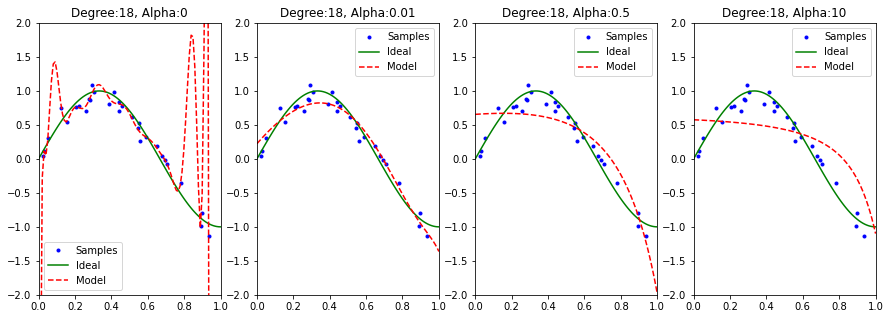

In [ ]:
from sklearn.linear_model import Ridge

np.random.seed(3)
m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

alphas = (0, 0.01, 0.5, 10)
plt.figure(figsize=(15,5))
coef_df = pd.DataFrame()
for i, alpha  in enumerate(alphas):
    poly = PolynomialFeatures(degree=18, include_bias=False)
    ridge = Ridge(alpha=alpha)
    pipe = Pipeline([('poly', poly), ('ridge', ridge)])
    pipe.fit(X.reshape(-1,1), y)

    X_ = np.linspace(0,1, 100)
    plt.subplot(1, len(alphas), i+1)
    plt.plot(X, y, 'b.', label='Samples')
    plt.plot(X_, sin(X_), 'g-', label='Ideal')
    plt.plot(X_, pipe.predict(np.expand_dims(X_, axis=1)), 'r--', label='Model')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:18, Alpha:{alpha}")
    coef_df[f'alpha:{alpha}'] = pd.Series(data=ridge.coef_)
display(coef_df)

## LASSO(라쏘) 모델
* LASSO(Least Absolute Shrinkage and Selection Operator)
  * L1 규제 계수 적용
  * $cost=\sum(y-\hat{y})^2 + \alpha\sum\|w\|_1$
  * 불필요한 회귀 계수를 급격히 감소, 0으로 만들어 제거
  * 특성(Feature) 선택에 유리
* L1 Norm 시각화
  * 벡터 𝑊 의 L1 Norm이 1일 때
  * $W = [w_1, w_2]$
  * $\|W\|_1 = |w_1|+ |w_2| = 1$

  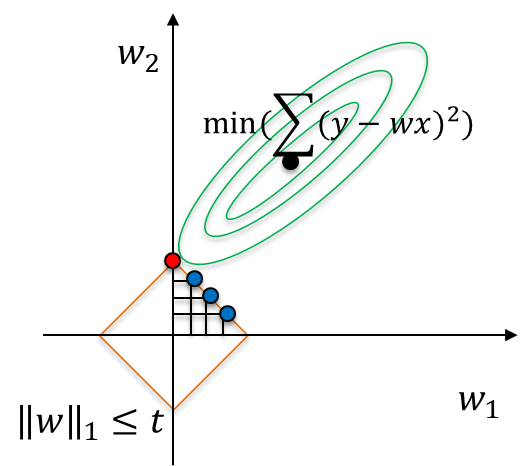

* `sklearn.linear_model.Lasso(alpha)  `

,alpha: 0,alpha: 0.0001,alpha: 0.005,alpha: 0.1
0,2.504322e+03,5.550944,0.731815,-0.000000
1,-1.336796e+05,-8.752908,-0.000000,-0.337698
2,3.856344e+06,-0.000000,-2.919153,-0.000000
3,-6.796702e+07,0.000000,-0.000000,-0.000000
4,7.933122e+08,1.305729,-0.000000,-0.000000
5,-6.477946e+09,0.966678,-0.000000,-0.000000
6,3.842805e+10,0.000000,-0.000000,-0.000000
7,-1.699369e+11,0.000000,-0.000000,-0.000000
8,5.698687e+11,0.000000,-0.000000,-0.000000
9,-1.463877e+12,-0.000000,-0.000000,-0.000000


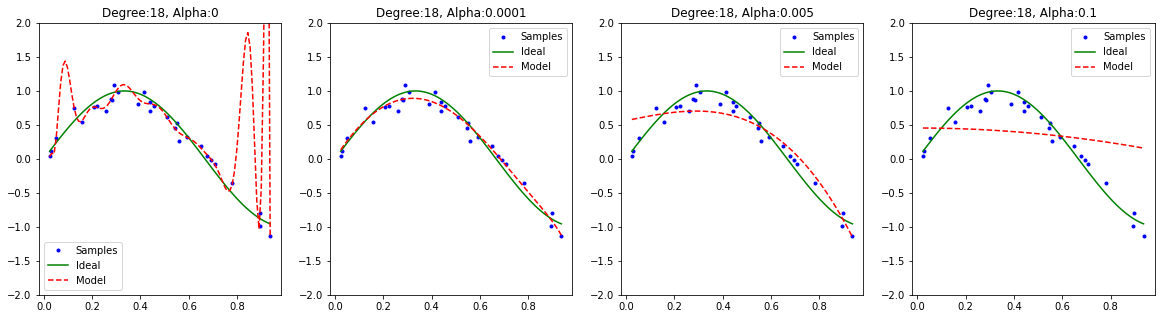

In [ ]:
np.random.seed(3)
def sin(X):
    return np.sin(1.5 * np.pi * X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

alphas = (0, 0.0001, 0.005, 0.1)
plt.figure(figsize=(20,5))
coef_df = pd.DataFrame()
for i, alpha  in enumerate(alphas):
    poly = PolynomialFeatures(degree=18, include_bias=False)
    if alpha==0:
      reg = LinearRegression()
    else:
      reg = Lasso(alpha=alpha)
    pipe = Pipeline([('poly', poly), ('reg', reg)])
    pipe.fit(X.reshape(-1,1), y)
    X_ = np.linspace(X.min(),X.max(), 100)
    plt.subplot(1, len(alphas), i+1)
    plt.plot(X, y, 'b.', label='Samples')
    plt.plot(X_, sin(X_), 'g-', label='Ideal')
    plt.plot(X_, pipe.predict(np.expand_dims(X_, axis=1)), 'r--', label='Model')
    plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:18, Alpha:{alpha}")
    series = pd.Series(data=reg.coef_)
    coef_df[f'alpha: {alpha}'] = series
display(coef_df)

## 보스턴 주택가격, 규제화 적용

In [ ]:
!pip install -U boston
from boston import load_boston

In [ ]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

pipe = Pipeline([('std', StandardScaler()),
                 ('poly', PolynomialFeatures()),
                 ('reg', Ridge())])
param1 = {'poly__degree': [2,3],
          'reg__alpha': np.arange(18, 25, 0.1),
          'reg':[Ridge()] }
param2 = {'poly__degree': [2,3],
          'reg__alpha': np.arange(0.01, 0.03, 0.001),
          'reg':[Lasso()] }



best param: {'poly__degree': 2, 'reg': Ridge(alpha=22.000000000000057), 'reg__alpha': 22.000000000000057}
train r2: 0.9312723248984814 test r2: 0.7804668026007046
best param: {'poly__degree': 2, 'reg': Lasso(alpha=0.02599999999999999), 'reg__alpha': 0.02599999999999999}
train r2: 0.9370112072170664 test r2: 0.7555486015842992


# Logistic Regression
* 선형 회귀 방식을 이용한 이진 분류 알고리즘
* 분류 레이블 : 0 or 1
* 0~1 범위를 예측 결과로 갖는 모델 필요
  * 가설 결과에 Sigmoid 함수 적용
* Logistic, sigmoid 함수
  * S자 모양의 함수
  * $s(z) = \frac{1}{1+e^{-z}}$
  * $z$값을 0과 1사이의 값으로 바꾸는 함수
* `sklearn.linear_model.LogisticRegression`




#### Sigmoid 함수 그리기

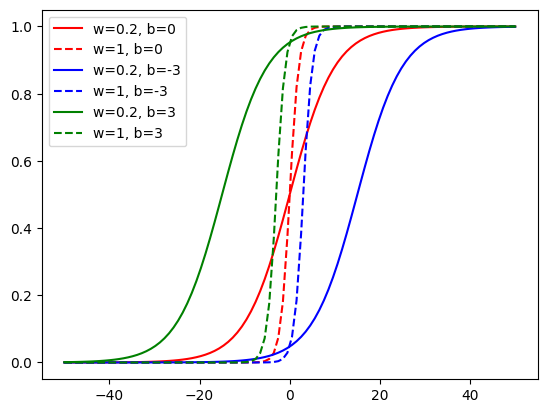

In [ ]:
def sigmoid(z):
    return  1/(1+np.exp(-z))

def drawSigmoid(w, b, style):
    x=np.linspace(-50,50,100).reshape(-1,1)
    y = sigmoid(x * w + b)
    plt.plot(x, y, style, label=f'w={w}, b={b}')

drawSigmoid(w=0.2, b=0, style='r-')
drawSigmoid(w=1,  b=0, style='r--')

drawSigmoid(w=0.2, b=-3, style='b-')
drawSigmoid(w=1, b=-3, style='b--')

drawSigmoid(w=0.2, b=3, style='g')
drawSigmoid(w=1,  b=3, style='g--')
plt.legend();

#### 로지스틱 회귀 실습: 랜덤수 분류

y_pred:[0]


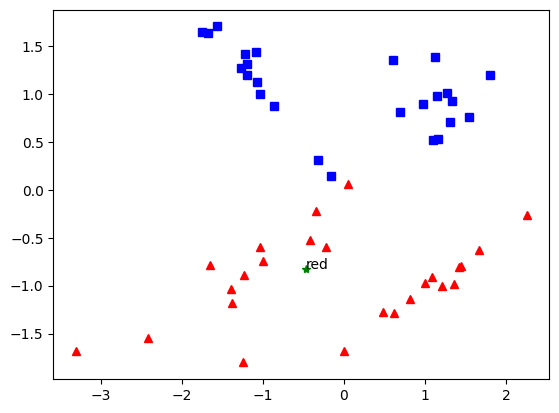

In [ ]:
np.random.seed(777)
X, y = make_classification(n_samples=50, n_features=2,
                           n_informative =2, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0)
plt.plot(X[y==0,0],X[y==0,1], 'r^') #0=red
plt.plot(X[y==1,0],X[y==1,1], 'bs') #1=blue
newb = np.random.randn(1,2)
plt.plot(newb[0,0], newb[0,1], 'g*')



#### 로지스틱 회귀 실습: 위스콘신 유방암

* load_breast_cancer()

In [ ]:
cancer = load_breast_cancer()
scaler = StandardScaler()
scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(scaled, cancer.target, random_state=0)



train acc:99.06%,         test acc:96.50%
